In [1]:
import pandas as pd
import numpy as np

## Gentoo Time Series

In [2]:
dfg2 = pd.read_excel('GentooDataTimeSeries.xlsx', header=0)
dfg2

,site name,site id,ccamlr region,Longitude EPSG:4326,Latitude EPSG:4326,common name,day,month,year,season starting,count,accuracy,count type,vantage,reference
0,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1984,1984,0,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
1,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1994,1994,14,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
2,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1995,1995,33,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
3,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1996,1996,45,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
4,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1997,1997,56,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
5,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1998,1998,26,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
6,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,1999,1999,149,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
7,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2000,2000,296,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
8,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2001,2001,288,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...
9,Biscoe Point,BISC,48.1,-63.7775,-64.8114,gentoo penguin,Unknown,Unknown,2002,2002,639,1,nests,ground,<strong>(ATCM) ANTARCTIC TREATY CONSULTATIVE M...


In [3]:
dfg2.columns

Index(['site name', 'site id', 'ccamlr region', 'Longitude EPSG:4326',
       'Latitude EPSG:4326', 'common name', 'day', 'month', 'year',
       'season starting', 'count', 'accuracy', 'count type', 'vantage',
       'reference'],
      dtype='object')

In [4]:
dfg2.drop(dfg2.columns.difference(['site name','year', 'count', 'accuracy', 'count type']), 1, inplace=True)
dfg2.head()

,site name,year,count,accuracy,count type
0,Biscoe Point,1984,0,1,nests
1,Biscoe Point,1994,14,1,nests
2,Biscoe Point,1995,33,1,nests
3,Biscoe Point,1996,45,1,nests
4,Biscoe Point,1997,56,1,nests


In [5]:
site_names = list(set(dfg2['site name']))
site_names

['Biscoe Point', 'Orne Islands', 'Vernadsky Station', 'Moot Point']

In [6]:
# Key for matching the accuracy
acc_key = {'1': 0.05, '2': 0.10, '3': 0.25, '4': 0.50, '5': 1}

In [9]:
GentooData = {}
for site in site_names:
    dfg2_local = dfg2[dfg2['site name']==site]
    # Find years for this site
    start_year = min(dfg2_local['year'])
    stop_year = max(dfg2_local['year'])
    years = np.arange(start_year, stop_year+1)
    # Dataframes for nest and chick counts
    dfg2_local_nests = dfg2_local[dfg2['count type']=='nests']
    dfg2_local_chicks = dfg2_local[dfg2['count type']=='chicks']
    # Years nest and chick counts were collected
    nest_years = dfg2_local_nests['year'].to_list()
    chick_years = dfg2_local_chicks['year'].to_list()
    # Obtain counts and accuracy
    nest_counts = dfg2_local_nests['count'].to_list()
    chick_counts = dfg2_local_chicks['count'].to_list()
    nest_acc = dfg2_local_nests['accuracy'].to_list()
    chick_acc = dfg2_local_chicks['accuracy'].to_list()
    # Initialize array to store counts and accuracy
    data = np.ones((2, len(years)))*np.nan
    err = np.ones((2, len(years)))*np.nan
    for i, year in enumerate(nest_years):
        data[0][year==years] = nest_counts[i]
        err[0][year==years] = acc_key[str(nest_acc[i])]
    for i, year in enumerate(chick_years):
        data[1][year==years] = chick_counts[i]
        err[1][year==years] = acc_key[str(chick_acc[i])]
    GentooData[site+' Counts'] = data
    GentooData[site+' Years'] = years
    GentooData[site+' Errors'] = err

/Users/yellaham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/yellaham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [10]:
GentooData

{'Biscoe Point Counts': array([[   0.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   14.,   33.,   45.,   56.,   26.,  149.,  296.,  288.,
          639.,  644.,  753.,  902.,  977.,   nan,   nan, 2401., 2404.,
         3081., 3197.],
        [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   nan]]),
 'Biscoe Point Years': array([1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
        1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012]),
 'Biscoe Point Errors': array([[0.05,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05,  nan,  nan, 0.05, 0.05, 0.05, 0.05],
        [ nan,  nan,  nan,  nan,  nan,  nan,  na

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

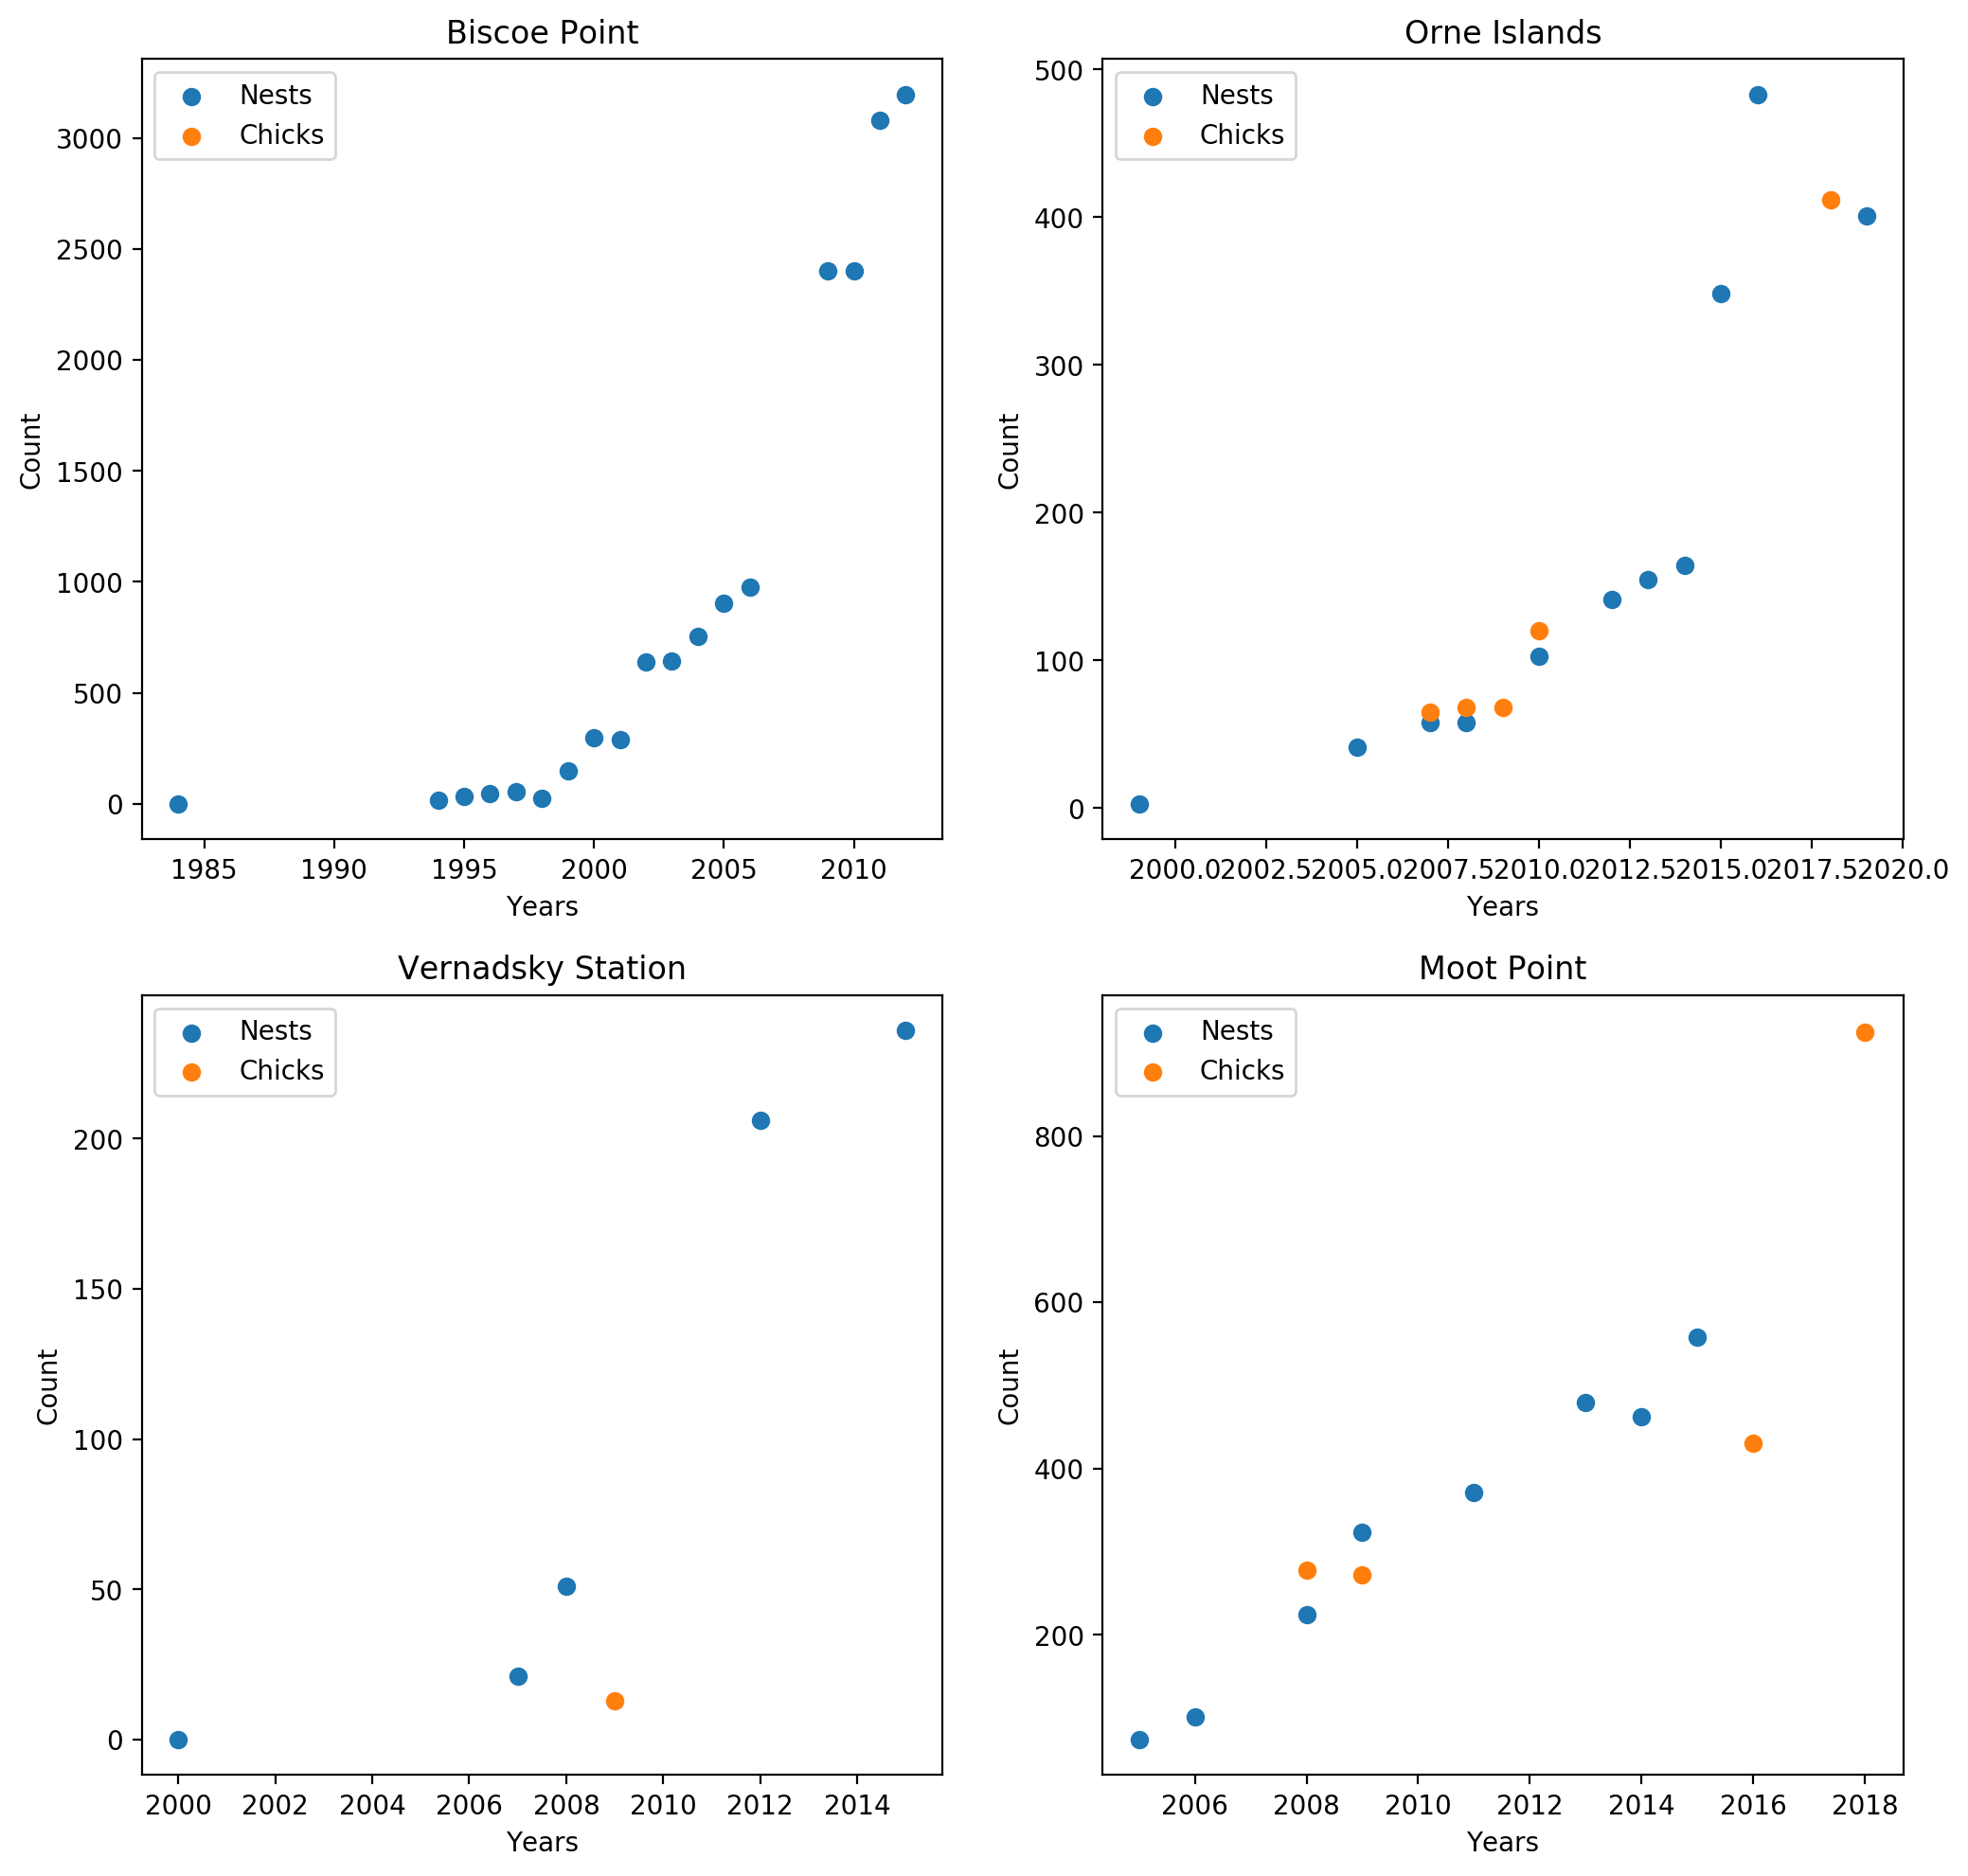

In [14]:
for i, site in enumerate(site_names):
    plt.subplot(2, 2, i+1)
    plt.scatter(GentooData[site+' Years'], GentooData[site+' Counts'][0])
    plt.scatter(GentooData[site+' Years'], GentooData[site+' Counts'][1])
    plt.title(site)
    plt.xlabel('Years')
    plt.ylabel('Count')
    plt.legend(['Nests', 'Chicks'])
plt.show()